In [1]:
from src.utils.plot_world_cloud import plot_feature_wordcloud
from src.utils.plot_time_distribution import *
from src.utils.sunburst import *
from src.scripts.rf_importance import *

In [2]:
from src.data.dataloader import load_data, extend_properties, timestamp

#List of all LIWC and text characteristics needed to extend properties.
LIWC_list = [
    "LIWC_Funct", "LIWC_Pronoun", "LIWC_Ppron", "LIWC_I",
    "LIWC_We", "LIWC_You", "LIWC_SheHe", "LIWC_They", "LIWC_Ipron",
    "LIWC_Article", "LIWC_Verbs", "LIWC_AuxVb", "LIWC_Past", "LIWC_Present",
    "LIWC_Future", "LIWC_Adverbs", "LIWC_Prep", "LIWC_Conj", "LIWC_Negate",
    "LIWC_Quant", "LIWC_Numbers", "LIWC_Swear", "LIWC_Social", "LIWC_Family",
    "LIWC_Friends", "LIWC_Humans", "LIWC_Affect", "LIWC_Posemo", "LIWC_Negemo",
    "LIWC_Anx", "LIWC_Anger", "LIWC_Sad", "LIWC_CogMech", "LIWC_Insight",
    "LIWC_Cause", "LIWC_Discrep", "LIWC_Tentat", "LIWC_Certain", "LIWC_Inhib",
    "LIWC_Incl", "LIWC_Excl", "LIWC_Percept", "LIWC_See", "LIWC_Hear",
    "LIWC_Feel", "LIWC_Bio", "LIWC_title", "LIWC_Health", "LIWC_Sexual",
    "LIWC_Ingest", "LIWC_Relativ", "LIWC_Motion", "LIWC_Space", "LIWC_Time",
    "LIWC_Work", "LIWC_Achiev", "LIWC_Leisure", "LIWC_Home", "LIWC_Money",
    "LIWC_Relig", "LIWC_Death", "LIWC_Assent", "LIWC_Dissent", "LIWC_Nonflu",
    "LIWC_Filler"
]

text_features=["num_chars","num_chars_no_space","frac_alpha","frac_digits","frac_upper","frac_space","frac_special",
"num_words","num_unique_words","num_long_words","avg_word_len","num_unique_stopwords","frac_stopwords",
"num_sentences","num_long_sentences","avg_chars_per_sentence","avg_words_per_sentence","automated_readability",
"vader_pos","vader_neg","vader_compound"] 

properties_name = text_features + LIWC_list

#This function will open and clean the data.
df_title, df_body = load_data()  

In [3]:
import pandas as pd

#This function will extend the properties from the original dataset to a new one to access easily the column.
df_title = extend_properties(df_title, properties_name)
df_body = extend_properties(df_body, properties_name)


#This function will transform the TIMESTAMP of the original data and extend it to have access to different timestamps.
df_title=timestamp(df_title)
df_body=timestamp(df_body)

#Concatenate the two datasets into one
df=pd.concat([df_title, df_body], axis=0)

In [48]:
# Create Sun Burst plot of LIWC  features
from src.utils.sunburst import *
create_liwc_sunburst(df, LIWC_list)


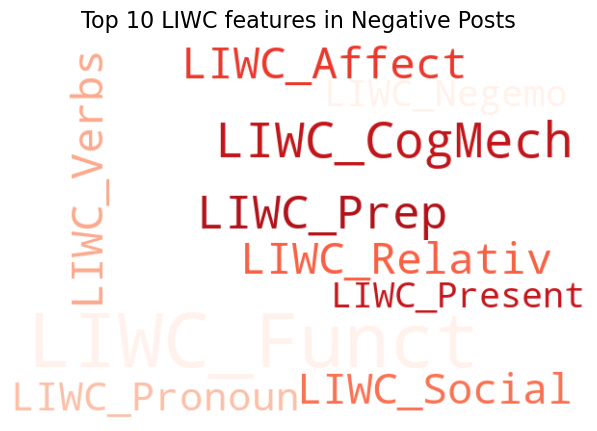

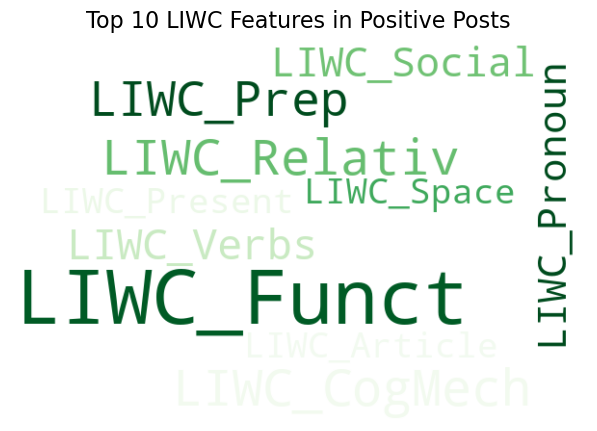

In [25]:
# Plot world clouds to visualized most used LIWC features 

# Plot for negative features
plot_feature_wordcloud(df, LIWC_list,  "Top 10 LIWC features in Negative Posts", "negative_world_cloud.png", link_sentiment=-1, color='Reds')

# Plot for positive features
plot_feature_wordcloud(df, LIWC_list, "Top 10 LIWC Features in Positive Posts", "positive_world_cloud.png", link_sentiment=1, color='Greens')

In [29]:
# Daily analysis of LIWC features changes
plot_daily_evolution(df_title)
# Monthly LIWC variation 
monthly_liwc_variation(df)
#Yearly conflict evolution
plot_yearly_evolution(df)

In [63]:
from src.scripts.rf_importance import *
# Random forest importance of LIWC features in negativity post
df['is_negative'] = (df['LINK_SENTIMENT'] == -1).astype(int)
random_forest(df, text_features, LIWC_list)

{'text_features': vader_neg                 0.148477
 vader_compound            0.126290
 frac_upper                0.074263
 frac_special              0.063896
 frac_alpha                0.056168
 frac_space                0.047473
 avg_word_len              0.047467
 automated_readability     0.043021
 frac_stopwords            0.042407
 num_chars_no_space        0.041250
 num_chars                 0.039378
 avg_chars_per_sentence    0.037904
 vader_pos                 0.034260
 num_unique_words          0.031842
 frac_digits               0.031691
 num_long_words            0.031049
 num_words                 0.028434
 num_unique_stopwords      0.027855
 avg_words_per_sentence    0.027413
 num_sentences             0.009906
 num_long_sentences        0.009556
 dtype: float64,
 'liwc_features': LIWC_Negemo     0.149647
 LIWC_Anger      0.143167
 LIWC_CogMech    0.089031
 LIWC_Relativ    0.085283
 LIWC_Social     0.077108
 LIWC_Affect     0.063920
 LIWC_Swear      0.049862
 LIWC_Posem

In [30]:
from src.scripts.conflict_definition import *
#this function will pair target and source where a negative hyperlink happen to define a conflict
dict_df_by_target, dict_df_by_source, neg_pair_conflict_hour = pair_conflict(df, properties_name)

In [50]:
from src.scripts.t_test_deltaLIWC import *
# This function will give the delta of LIWC features after an attack
df_timeseries = delta_LIWC_timeseries(
        dict_df_by_target=dict_df_by_target,
        dict_df_by_source=dict_df_by_source,
        neg_pair_conflict_hour=neg_pair_conflict_hour,
        properties_name=properties_name,
        window_segments=[(0, 2), (2, 6), (6, 12), (12, 24), (24, 48)]  
    )
    

Building LIWC timeseries with multiple segments


Building panel: 100%|██████████| 80506/80506 [14:49<00:00, 90.49it/s]  


In [ ]:
# Analysis recovery of LIWC after an attack and plot histogram of it 
from src.scripts.recovery_analysis import *
from src.utils.plot_recovery import * 


interesting_features = [
    'Negemo', 'Posemo', 'Anx', 'Anger', 'Sad', 'Social',
    'CogMech', 'Assent', 'Dissent', 'Swear'
]
recovery_df=  visualize_liwc_recovery(df_timeseries, interesting_features)
stats_df= plot_recovery_histogram(recovery_df,  interesting_features)
#'images/liwc_delta_analysis.html', 'images/liwc_recovery_rate.html',images/recovery_histogram.html'


TOP 5 FEATURES WITH LARGEST INCREASES:
  • Negemo: +0.0002 (Recovery: 12.1h)
  • Swear: +0.0000 (Recovery: 11.7h)
  • Anger: +0.0000 (Recovery: 11.9h)
  • Sad: +0.0000 (Recovery: 11.6h)
  • Anx: +0.0000 (Recovery: 11.6h)

 TOP 5 FEATURES WITH LARGEST DECREASES:
  • Social: -0.0003 (Recovery: 12.3h)
  • CogMech: -0.0001 (Recovery: 12.2h)
  • Dissent: -0.0000 (Recovery: 11.6h)
  • Posemo: -0.0000 (Recovery: 12.0h)
  • Assent: -0.0000 (Recovery: 11.6h)

 FASTEST RECOVERING FEATURES:
  • Dissent: 11.6h to recover
  • Assent: 11.6h to recover
  • Anx: 11.6h to recover
  • Sad: 11.6h to recover
  • Swear: 11.7h to recover

 FEATURES THAT OFTEN DON'T RECOVER:
  • CogMech: 9992/26568 never recovered
  • Social: 8973/26568 never recovered
  • Posemo: 7326/26568 never recovered
  • Negemo: 5823/26568 never recovered
  • Anger: 3967/26568 never recovered


In [ ]:
from src.scripts.attacker_impact import *

display(df_timeseries)
# Analysis of the impact of the LIWC of the attackants of LIWC of the targetted subreddits 
results_overall = attacker_impact_analysis(
    df_timeseries, 
    interesting_features
)
#influential-attack.html, attack_LIWC_correlation.html

source        target  ... delta_LIWC_Filler  incoming_LIWC_Filler
0              procss   100yearsago  ...          0.000000              0.000000
1      subredditdrama  1200isplenty  ...          0.007923              0.000000
2      subredditdrama  1200isplenty  ...          0.007923              0.000000
3      subredditdrama     2007scape  ...          0.000000              0.000000
4      subredditdrama     2007scape  ...          0.006250              0.003185
...               ...           ...  ...               ...                   ...
46472  subredditdrama           zen  ...          0.000000              0.000000
46473          bestof           zen  ...          0.000000              0.000000
46474  subredditdrama           zen  ...          0.000000              0.000000
46475  subredditdrama           zen  ...         -0.002163              0.000000
46476           drama           zen  ...          0.000000              0.000000

[46477 rows x 178 columns]


 Most influential attacker feature: 'Swear' (avg |r| = 0.008)

 Top 5 attacker→target correlations:
   1. Swear → Assent: r = 0.015 (p = 0.0015)
   2. Assent → Sad: r = 0.015 (p = 0.0017)
   3. Anx → Negemo: r = -0.014 (p = 0.0022)
   4. Swear → Social: r = -0.013 (p = 0.0040)
   5. Anx → Anger: r = -0.013 (p = 0.0040)


In [ ]:
from src.scripts.granger_analysis import *
from src.utils.plot_granger import *
# This function will run a granger analysis on the 20 most targetted subreddits to study causality

records = granger_analysis(df)
plot_results(records)
#granger_analysis.html

For subreddit 'worldnews' at frequency 'H':
At lag 1, we reject the null hypothesis: being attacked Granger-causes negative behavior.
For subreddit 'worldnews' at frequency 'H':
At lag 2, we reject the null hypothesis: being attacked Granger-causes negative behavior.
For subreddit 'news' at frequency 'H':
At lag 1, we reject the null hypothesis: being attacked Granger-causes negative behavior.
For subreddit 'news' at frequency 'H':
At lag 2, we reject the null hypothesis: being attacked Granger-causes negative behavior.
For subreddit 'politics' at frequency 'H':
At lag 1, we reject the null hypothesis: being attacked Granger-causes negative behavior.
For subreddit 'politics' at frequency 'H':
At lag 2, we reject the null hypothesis: being attacked Granger-causes negative behavior.
For subreddit 'wtf' at frequency 'H':
At lag 2, we reject the null hypothesis: being attacked Granger-causes negative behavior.
For subreddit 'subredditdrama' at frequency 'H':
At lag 1, we reject the null hy

Cluster analysis

In [4]:
from src.models.louvain import *
# Louvain for the entire dataset 
G_all = build_network(df_title)
partition_all = compute_louvain(G_all)
print("Total number of communities using Louvain:", count_communities(partition_all))



Total number of communities using Louvain: 839


In [ ]:
import pandas as pd

# Open the cluster and label the 20 most virulent one it by hand 
df_clusters = pd.read_csv('cluster_full_data_2.csv')

subreddit_to_theme = {}

for _, row in df_clusters.iterrows():
    themes = row["Cluster_ID"]
    
    # Get all subreddits per theme
    subs = str(row["All_Members"]).split(",")
    subs = [s.strip().lower() for s in subs]

    for s in subs:
        if s:  # ignore empty strings
            subreddit_to_theme[s] = themes


# Map cluster assignement
df["cluster_source"] = df["SOURCE_SUBREDDIT"].str.lower().map(subreddit_to_theme)
df["cluster_target"] = df["TARGET_SUBREDDIT"].str.lower().map(subreddit_to_theme)


cluster_conflict = (
        df[df["LINK_SENTIMENT"] == -1]
            .groupby("cluster_source")
            .size()
            .rename("conflict_score")
)

df_clusters["conflict_score"] = df_clusters["Cluster_ID"].map(cluster_conflict)


top20 = df_clusters.nlargest(20, "conflict_score")

display(top20)

auto_labels = [
    "Drama", "Politics", "Everyday life", "Animals", "Religion",
    "Relantionships", "General knowledge", "Conspiracy", "Gaming",
    "Fitness", "Language", "Television", "Complain about reddit",
    "Cryptocurrency", "Country", "Canada", "Music", "Legal"
]

cluster_to_theme = dict(enumerate(auto_labels))

# Assign theme to clusters
df_clusters["theme"] = df_clusters["Cluster_ID"].map(cluster_to_theme)


subreddit_to_theme = {}

for _, row in df_clusters.iterrows():
    themes = row["theme"]
    
    # Get all subreddits per theme
    subs = str(row["All_Members"]).split(",")
    subs = [s.strip().lower() for s in subs]

    for s in subs:
        if s:  # ignore empty strings
            subreddit_to_theme[s] = themes

# Map cluster assignement
df["cluster_source"] = df["SOURCE_SUBREDDIT"].str.lower().map(subreddit_to_theme)
df["cluster_target"] = df["TARGET_SUBREDDIT"].str.lower().map(subreddit_to_theme)





Cluster_ID  Size           Auto_Label  \
11        2267   468       subredditdrama   
9         1254   493  sandersforpresident   
2           26   704         outoftheloop   
38         197   221                 dogs   
17         518   410         christianity   
6           77   598        relationships   
12         110   447            askreddit   
30          24   299           conspiracy   
0           57   959                  ps4   
22         523   353              fitness   
37         455   226                india   
4          150   648                 iama   
8           12   493       writingprompts   
18        4493   401    ideasfortheadmins   
26         137   325              bitcoin   
7          220   591               europe   
40        7014   213               canada   
3          152   679                music   
28         206   313          legaladvice   
13           6   438      globaloffensive   

                                             Top_Hubs  \
11  subredditdrama, drama, subredditcancer, circle...   
9   sandersforpresident, shitliberalssay, the_dona...   
2   outoftheloop, copypasta, karmacourt, subreddit...   
38            dogs, askvet, aww, houston, dogtraining   
17  christianity, askhistorians, atheism, badhisto...   
6   relationships, offmychest, suicidewatch, relat...   
12  askreddit, explainlikeimfive, showerthoughts, ...   
30  conspiracy, undelete, futurology, c_s_t, elect...   
0         ps4, gaming, destinythegame, games, gamedev   
22          fitness, loseit, keto, cooking, xxfitness   
37  india, languagelearning, china, translator, az...   
4   iama, movies, fantheories, television, comicbooks   
8    writingprompts, nosleep, books, fantasy, writing   
18  ideasfortheadmins, bugs, spam, thesefuckingacc...   
26  bitcoin, dogecoin, cryptocurrency, dogemarket,...   
7                 europe, de, france, iranian, sweden   
40             canada, tagpro, toronto, quebec, cmhoc   
3   music, hiphopheads, electronicmusic, edmproduc...   
28  legaladvice, askdocs, askacademia, adhd, academia   
13  globaloffensive, dota2, steam, tf2, globaloffe...   

                                            Top_Cores  \
11  debateamr, feminismformen, askstrawfeminists, ...   
9   anarchocapitalism, missouri4sanders, lessig201...   
2   unnecessaryquotes, fullscorpion, oopsdidntmean...   
38  goldendoodles, australianshepherd, bernesemoun...   
17  continentaltheory, agnostic, existentialism, d...   
6   asexual, survivorsofabuse, sterilization, badr...   
12  brocabulary, askshittyscience, sciencejokes, m...   
30  postcollapse, cyborgs, ranprieur, farmtech, an...   
0   mgsphantompain, moddergearsolid, skyrim_mods, ...   
22  runningwithdogs, dietetics, firstmarathon, veg...   
37  seoul, abcdcirclejerk, indianstartups, indiacc...   
4   scorpion, bloodandicecream, fanedits, oitnb, x...   
8   writerchat, buymybook, creativewriting, suchis...   
18  shitty_t_shirts, listofsubreddits, superpowers...   
26  syscoin, golemproject, joinmarket, coinbase, f...   
7          brussels, macedonia, oman, kosovo, belarus   
40       reddeer, gatineau, fortmac, barrie, whistler   
3   musicinthemaking, macdemarco, vinyljerk, neutr...   
28  historyteachers, physicianassistant, doctors, ...   
13  payday2secret, 3kliksphilip, gonewildnegev, ma...   

                                          All_Members  conflict_score  
11  campusreform, rage, askstrawfeminists, downvot...         29779.0  
9   comments, trump_train, libertarianpartyohio, a...          7289.0  
2   beetlejuicing, funnycharts, fastfoodreview, aw...          4745.0  
38  dogpictures, parrots, whippets, karma, taiwanc...          3619.0  
17  nonfictionbookclub, foreignpolicy, debateacath...          3040.0  
6   kahootcrashing, men, teenrelationships, perfec...          2709.0  
12  cutouts, gecko45, smartereveryday, blackpeople...          1666.0  
30  phones, techwar, badbios, conspiracytheories, ...          1592.0  
0   gtaonlineh

In [25]:
cluster_conflict = (
    df[df["LINK_SENTIMENT"] == -1]
        .groupby("cluster_source")
        .size()
        .rename("conflict_score")
)

top20_clusters = cluster_conflict.nlargest(20).index
df_top20 = df[df["cluster_source"].isin(top20_clusters)]


In [26]:
#This function will plot a radar plot to show mean LIWC profile of the clusters in their subreddits hyperlink.
from src.scripts.cluster_profile import cluster_profiles
cluster_norm, cluster_to_subreddits = cluster_profiles(df_top20, subreddit_to_theme)

In [16]:
LIWC_list = [
        "LIWC_Negate", "LIWC_Swear", "LIWC_Social", "LIWC_Family",
        "LIWC_Friends", "LIWC_Humans", "LIWC_Affect", "LIWC_Posemo", "LIWC_Negemo",
        "LIWC_Anx", "LIWC_Anger", "LIWC_Sad", "LIWC_CogMech", "LIWC_Sexual",
        "LIWC_Relativ", "LIWC_Achiev", "LIWC_Leisure", "LIWC_Money",
        "LIWC_Relig", "LIWC_Death"
    ]

In [ ]:
# 
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from statsmodels.stats.multitest import multipletests

def calculate_liwc_cluster_association(df, liwc_columns, cluster_column='cluster_source', alpha=0.05):
    """
    Calculate association between clusters and LIWC categories using Chi-square tests.
    
    Parameters:
    - df: DataFrame containing cluster assignments and LIWC features
    - liwc_columns: List of LIWC column names
    - cluster_column: Column name for cluster assignments
    - alpha: Significance level for multiple testing correction
    """
    
    # Create binarized LIWC features (presence/absence or above/below median)
    liwc_binary = {}
    for liwc_col in liwc_columns:
        if liwc_col in df.columns:
            # Convert to binary: 1 if above median, 0 otherwise
            median_val = df[liwc_col].median()
            liwc_binary[liwc_col] = (df[liwc_col] > median_val).astype(int)
    
    # Get unique clusters
    clusters = sorted(df[cluster_column].unique())
    
    # Initialize results matrices
    p_values = np.ones((len(clusters), len(liwc_columns)))
    chi2_stats = np.zeros((len(clusters), len(liwc_columns)))
    effect_sizes = np.zeros((len(clusters), len(liwc_columns)))
    
    # Perform chi-square tests for each cluster-LIWC pair
    for i, cluster in enumerate(clusters):
        cluster_mask = (df[cluster_column] == cluster)
        
        for j, liwc_col in enumerate(liwc_columns):
            if liwc_col in df.columns:
                # Create contingency table
                contingency = pd.crosstab(
                    cluster_mask, 
                    liwc_binary[liwc_col]
                )
                
                # Ensure table is 2x2
                if contingency.shape == (2, 2):
                    try:
                        chi2, p, dof, expected = chi2_contingency(contingency)
                        p_values[i, j] = p
                        chi2_stats[i, j] = chi2
                        
                        # Calculate Cramér's V as effect size
                        n = contingency.sum().sum()
                        effect_sizes[i, j] = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
                    except:
                        p_values[i, j] = 1.0
                        effect_sizes[i, j] = 0.0
    
    # Apply multiple testing correction
    p_flat = p_values.flatten()
    reject_flat, p_corrected_flat, _, _ = multipletests(p_flat, alpha=alpha, method='fdr_bh')
    p_values_corrected = p_corrected_flat.reshape(p_values.shape)
    reject = reject_flat.reshape(p_values.shape)
    
    return {
        'p_values': p_values,
        'p_values_corrected': p_values_corrected,
        'chi2_stats': chi2_stats,
        'effect_sizes': effect_sizes,
        'reject_null': reject,
        'clusters': clusters,
        'liwc_columns': liwc_columns
    }

import plotly.graph_objects as go
import numpy as np

def create_combined_interactive_heatmap(results, 
                                        title="Cluster-LIWC Association"):

    effect = results['effect_sizes']
    p_corr = results['p_values_corrected']
    chi2_stats = results['chi2_stats']
    
    clusters = [f"Cluster {c}" for c in results['clusters']]
    liwc_columns = results['liwc_columns']

    # Significance annotation (stars)
    stars = np.where(
        p_corr < 0.001, "***",
        np.where(p_corr < 0.01, "**",
        np.where(p_corr < 0.05, "*", ""))
    )

    # Build hover text
    hover_text = []
    for i in range(effect.shape[0]):
        row = []
        for j in range(effect.shape[1]):
            star = stars[i, j]
            p_value = p_corr[i, j]
            effect_size = effect[i, j]
            chi2 = chi2_stats[i, j]

            row.append(
                f"<b>{clusters[i]} — {liwc_columns[j]}</b><br>"
                f"Corrected p-value: {p_value:.4e}<br>"
                f"Effect size (Cramér's V): {effect_size:.3f}<br>"
                f"Chi²: {chi2:.2f}<br>"
                f"Significance: {star if star!='' else 'ns'}"
            )
        hover_text.append(row)

    # Main heatmap (effect size)
    fig = go.Figure(data=go.Heatmap(
        z=effect,
        x=liwc_columns,
        y=clusters,
        colorscale="Viridis",
        text=stars,           # stars displayed on heatmap
        texttemplate="%{text}",
        hoverinfo="text",
        textfont={"color": "white", "size": 12},
        customdata=hover_text,
        hovertemplate="%{customdata}<extra></extra>",
        colorbar=dict(title="Cramér’s V")
    ))

    fig.update_layout(
        title=dict(text=title, x=0.5, font=dict(size=18)),
        xaxis=dict(title="LIWC Categories", tickangle=45),
        yaxis=dict(title="Clusters"),
        width=1200,
        height=700,
        plot_bgcolor="white"
    )

    return fig

#Launch analyis s
results=calculate_liwc_cluster_association(df_top20, LIWC_list, cluster_column='cluster_source', alpha=0.05)

# Create visualization
results = calculate_liwc_cluster_association(
    df_top20, LIWC_list, cluster_column='cluster_source', alpha=0.05
)

fig = create_combined_interactive_heatmap(results)
fig.show()
significant_associations = np.sum(results['reject_null'])

# Show most significant associations
if significant_associations > 0:
    print(f"\ MOST SIGNIFICANT ASSOCIATIONS:")
    flat_indices = np.argsort(results['p_values_corrected'].flatten())
    for idx in flat_indices[:5]:  # Top 5
        i, j = np.unravel_index(idx, results['p_values_corrected'].shape)
        if results['p_values_corrected'][i, j] < 0.05:
            cluster = results['clusters'][i]
            liwc = results['liwc_columns'][j]
            p_val = results['p_values_corrected'][i, j]
            effect = results['effect_sizes'][i, j]
            print(f"  Cluster {cluster} - {liwc}: p={p_val:.6f}, effect={effect:.3f}")


<>:159: SyntaxWarning:

invalid escape sequence '\ '

<>:159: SyntaxWarning:

invalid escape sequence '\ '

C:\Users\mathi\AppData\Local\Temp\ipykernel_5036\3922534774.py:159: SyntaxWarning:

invalid escape sequence '\ '



\ MOST SIGNIFICANT ASSOCIATIONS:
  Cluster Complain about reddit - LIWC_Anx: p=0.000000, effect=0.146
  Cluster Complain about reddit - LIWC_Death: p=0.000000, effect=0.143
  Cluster General knowledge - LIWC_Family: p=0.000000, effect=0.137
  Cluster Complain about reddit - LIWC_Family: p=0.000000, effect=0.135
  Cluster Complain about reddit - LIWC_Relig: p=0.000000, effect=0.108


In [34]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def compute_cluster_conflict_matrix(df, cluster_col_source="cluster_source", cluster_col_target="cluster_target"):
    """
    Computes a symmetric matrix of negative interaction intensity
    between clusters.
    """

    # Filter only negative interactions
    df_neg = df[df["LINK_SENTIMENT"] == -1]

    clusters = sorted(df[cluster_col_source].dropna().unique())
    n = len(clusters)

    # create mapping cluster -> index
    idx = {c: i for i, c in enumerate(clusters)}

    # Empty square matrix
    M = np.zeros((n, n), dtype=int)

    # Fill matrix
    for _, row in df_neg.iterrows():
        s = row[cluster_col_source]
        t = row[cluster_col_target]
        if pd.notna(s) and pd.notna(t):
            M[idx[s], idx[t]] += 1
    
    # Make symmetric version
    M_sym = M + M.T  

    return clusters, M, M_sym


In [ ]:
def plot_inter_cluster_conflict_matrix(clusters, M_sym, title="Cross-Cluster Conflict Matrix"):
    """
    Interactive Plotly heatmap showing symmetric conflict intensity
    between clusters.
    """

    fig = go.Figure(data=go.Heatmap(
        z=M_sym,
        x=clusters,
        y=clusters,
        colorscale="Reds",
        hoverongaps=False,
        colorbar=dict(title="Conflict Intensity")
    ))

    fig.update_layout(
        title=dict(text=title, x=0.5, font=dict(size=18)),
        xaxis=dict(title="Target Cluster", tickangle=45),
        yaxis=dict(title="Source Cluster"),
        width=900,
        height=800,
    )

    return fig


In [37]:
clusters, M, M_sym = compute_cluster_conflict_matrix(df)

fig = plot_inter_cluster_conflict_matrix(clusters, M_sym)
fig.show()
